<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/LowAccurateModelForClassification(NoCNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow


In [43]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [47]:
len(X_train)

50000

In [53]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
#these are labels
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

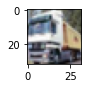

In [8]:
plot_sample(1)

In [9]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
classes[y_train[1][0]]

'truck'

In [23]:
#Now scalling the images
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
#Now we are converting the catogeries into one hot encoded format
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
#Now converting the y_test into one hot
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)
y_test_categorical[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

##Creating Model

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [61]:
#setting random seed
tf.random.set_seed(42)
#making model
model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(32,32,3)),
     keras.layers.Dense(3000,activation='relu'),
     keras.layers.Dense(400,activation='relu'),
     keras.layers.Dense(10,activation='softmax'),

    ]
)
#compiling model
model.compile(
    loss='categorical_crossentropy',
    optimizer="SGD",
    metrics=["accuracy"]
)
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8186 - accuracy: 0.3519
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6279 - accuracy: 0.4262
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5476 - accuracy: 0.4556
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4865 - accuracy: 0.4744
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4389 - accuracy: 0.4937
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3924 - accuracy: 0.5099
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3566 - accuracy: 0.5233
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3238 - accuracy: 0.5357
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2902 - accuracy: 0.5470
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.260

In [62]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [63]:
classes[y_test[1][0]]

'ship'

**Note:** Our model is not too accurate because we did not converted the RGB image to Gray scale image. Our accuracy on test data is low accurate (54%) means it has high loss while our model on trainning data is high accurate (94%) and it has low loss this means that our model is highly biase and it has big neural network and we did not converted our image to grey scale.

In [64]:
#Accuracy is
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.7079 - accuracy: 0.5225


[1.7078502178192139, 0.5224999785423279]